<a href="https://colab.research.google.com/github/Kennedy87670/Introduction-to-ML-DP/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the pratice of writing algorithn which can discover patterns in visual data. such as the camera of a self-driving car regonizing the car in front

Get the data
The images we are working with are from FOOD101 dataset (101 different classes of food):https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (pizza & steak) using the image data modification notebook

**Note** we start with a smaller dataset so we can experiment quickly and figure what works(or better what doesnt work before scaling up)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-13 14:21:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  40.4MB/s    in 2.6s    

2022-07-13 14:21:15 (40.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become on with it)

A very crucial step at the beginning of any machine learning project is becoming one with the DeprecationWarning

And for a computer vision project.... this usually means visuallizing many samples of our data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are{len(dirnames)} dirctories and {len(filenames)} images in '{dirpath}'. ")

There are2 dirctories and 0 images in 'pizza_steak'. 
There are2 dirctories and 0 images in 'pizza_steak/train'. 
There are0 dirctories and 750 images in 'pizza_steak/train/pizza'. 
There are0 dirctories and 750 images in 'pizza_steak/train/steak'. 
There are2 dirctories and 0 images in 'pizza_steak/test'. 
There are0 dirctories and 250 images in 'pizza_steak/test/pizza'. 
There are0 dirctories and 250 images in 'pizza_steak/test/steak'. 


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 13 14:21 .
drwxr-xr-x 1 root root 4096 Jul 13 14:21 ..
drwxr-xr-x 4 root root 4096 Jul 13 14:21 test
drwxr-xr-x 4 root root 4096 Jul 13 14:21 train


In [7]:
# ANOTHER way to find out how many omages are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first lets get the class names programmatically

In [8]:
# Get the classnams programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # setup the target directory(we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape} ") # show the shape of the image

  return img

['839461.jpg']
Image shape: (512, 307, 3) 


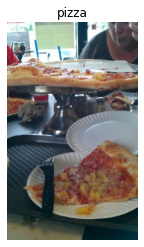

In [10]:
# View  a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [11]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 307, 3), dtype=uint8, numpy=
array([[[190, 148, 150],
        [205, 163, 165],
        [250, 208, 210],
        ...,
        [ 97,  86,  84],
        [ 95,  84,  82],
        [ 94,  83,  81]],

       [[199, 160, 163],
        [205, 166, 169],
        [237, 201, 203],
        ...,
        [ 91,  81,  80],
        [ 90,  80,  79],
        [ 89,  79,  78]],

       [[196, 166, 166],
        [193, 163, 163],
        [213, 183, 183],
        ...,
        [ 88,  79,  80],
        [ 87,  78,  79],
        [ 86,  77,  78]],

       ...,

       [[117, 122, 100],
        [116, 121,  99],
        [116, 121,  99],
        ...,
        [  0,  52,  65],
        [  0,  52,  65],
        [  0,  52,  65]],

       [[116, 121,  99],
        [116, 121,  99],
        [117, 122, 100],
        ...,
        [  1,  53,  66],
        [  1,  53,  66],
        [  1,  53,  66]],

       [[114, 119,  97],
        [115, 120,  98],
        [116, 121,  99],
        ...,
        [  1,  53,  6

In [12]:
# view the image shape
img.shape  # returns width, height, colour channels


(512, 307, 3)

In [13]:
img.max()

255

In [14]:
img.min

<function ndarray.min>

**Note** as we have discussed before many machine learning models, including neural networks prefer the values theywork with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as normalize) their pixel values by dividing the image array 255. (since 255 is the maximu pixel value)

In [15]:
# Get all the pixe values between 0 and 1
img/225.

array([[[0.84444444, 0.65777778, 0.66666667],
        [0.91111111, 0.72444444, 0.73333333],
        [1.11111111, 0.92444444, 0.93333333],
        ...,
        [0.43111111, 0.38222222, 0.37333333],
        [0.42222222, 0.37333333, 0.36444444],
        [0.41777778, 0.36888889, 0.36      ]],

       [[0.88444444, 0.71111111, 0.72444444],
        [0.91111111, 0.73777778, 0.75111111],
        [1.05333333, 0.89333333, 0.90222222],
        ...,
        [0.40444444, 0.36      , 0.35555556],
        [0.4       , 0.35555556, 0.35111111],
        [0.39555556, 0.35111111, 0.34666667]],

       [[0.87111111, 0.73777778, 0.73777778],
        [0.85777778, 0.72444444, 0.72444444],
        [0.94666667, 0.81333333, 0.81333333],
        ...,
        [0.39111111, 0.35111111, 0.35555556],
        [0.38666667, 0.34666667, 0.35111111],
        [0.38222222, 0.34222222, 0.34666667]],

       ...,

       [[0.52      , 0.54222222, 0.44444444],
        [0.51555556, 0.53777778, 0.44      ],
        [0.51555556, 0

## AN END-END EXAMPE
lets build a Convolution neural network to find patterns in our images, more speciafially we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our mpimg.image
* Compile our CNN
* Fit the CNN to our training data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# preproces data (get all of the pixel values between 0 & 1, also called normilization/ scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/train"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42
                                               )
# Build a CNN model ( same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters =10,
                                                             kernel_size =3,
                                                             activation = 'relu',
                                                             input_shape = (224, 224, 3)),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding='valid'),
          tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
          tf.keras.layers.Conv2D(10, 3, activation="relu"),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation= 'sigmoid')

])

# compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 289ms/step - loss: 0.5478 - accuracy: 0.7207 - val_loss: 0.5193 - val_accuracy: 0.7233
Epoch 2/5
47/47 [==============================] - 13s 281ms/step - loss: 0.4339 - accuracy: 0.8027 - val_loss: 0.4018 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.3874 - accuracy: 0.8340 - val_loss: 0.3428 - val_accuracy: 0.8607
Epoch 4/5
47/47 [==============================] - 13s 277ms/step - loss: 0.3638 - accuracy: 0.8393 - val_loss: 0.3479 - val_accuracy: 0.8567
Epoch 5/5
47/47 [==============================] - 13s 277ms/step - loss: 0.3247 - accuracy: 0.8600 - val_loss: 0.2948 - val_accuracy: 0.8867


**Note** if the above cell is taking longer tahn -10 seconds per epoch make sure you are using GPU by going to Runtime-> Chabge Runtime -> Hardware Accelator -> Gpu (you may have to rerun the cells above).

In [17]:
len(train_data)

47

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

https://poloclub.github.io/cnn-explainer/


CNN explainer

## Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data.

The model we are building is from TensorFlow playground:https://playground.tensorflow.org

In [19]:
# set random seed 
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile our CNN
model_2.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 265ms/step - loss: 1.9140 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1),
model_2 performs terribly ....  lets try to improve 

In [21]:
# set random seed 
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile our model
model_3.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 264ms/step - loss: 3.0684 - accuracy: 0.6353 - val_loss: 0.9740 - val_accuracy: 0.6713
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.8871 - accuracy: 0.7007 - val_loss: 0.8117 - val_accuracy: 0.6667
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6052 - accuracy: 0.7413 - val_loss: 0.6949 - val_accuracy: 0.6767
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6799 - accuracy: 0.7467 - val_loss: 0.4452 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.5377 - accuracy: 0.7707 - val_loss: 0.3906 - val_accuracy: 0.8353


In [22]:
# summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note** You can think of trainable parameters as patterns a model can learn from data. intuitively, you might think more is better. and in lots of cases, it is. but in this case, the difference here is the two different style of model we are using. where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neautral network seeks to sort out and learn the most important patterns in an image. So even though these are less learnable parameters in our convolutuional neaural network, these are often more helpful in dechipering between different features in an image

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification : lets break it out

1. Become one with data (visualize, visualize, visualize)
2. Preproces the data (prepare it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Ajust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

Become one with the data

['2534567.jpg']
Image shape: (512, 512, 3) 
['271592.jpg']
Image shape: (384, 512, 3) 


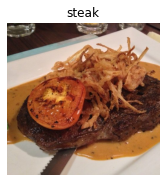

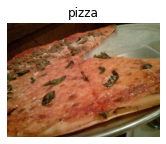

In [24]:
# visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "pizza")


## 2. preprocess the data(prepare it for a model)

In [25]:
## Define our diectory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of data. rather than look at all 10,000 images at once, a model might only look at 32 at a time

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor (GPU)

2. Try to learn the patterns in 10,000 images in one hit could result in model not being able to learn very well.

why 32?? 
Because 32 is good 

In [26]:
!nvidia-smi

Wed Jul 13 14:24:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
## Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
# load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of image
                                               target_size=(224,224),# target sie of mages (height, width)
                                               class_mode='binary',# type of data you are working with
                                               batch_size=32)# size of minbatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# get a sample of a train data batch
images, labels = train_data.next() #get the next batch of images/labels in tarin data
len(images), len(labels)

(32, 32)

In [30]:
# how many batches are there?
len(train_data)

47

In [31]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [32]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimentand then as you keep experimenting, you try to beat the baseline

**Note**: In deep learning, there is almost an infinite amount of architecture you could create. so one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_4 = Sequential([
  Conv2D(filters =10, # its the number of sliding windows going across an input(higher= more complex model)
         kernel_size=3, # the side of the sliding window going across an input
         strides=1, # the size of steps the sliding window takes across an input
         padding="valid", # if same, output is same as input shape, if valid output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neauron)

])

In [35]:
# compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [36]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [37]:
## Fit the model
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
#fit the model
history_4 =  model_4.fit(train_data, # this is a combination of labels and samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                       
                       
                       )

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 1.9893 - accuracy: 0.6100 - val_loss: 0.4613 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4680 - accuracy: 0.7973 - val_loss: 0.3806 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3293 - accuracy: 0.8627 - val_loss: 0.3736 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.1971 - accuracy: 0.9440 - val_loss: 0.5021 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0867 - accuracy: 0.9793 - val_loss: 0.5344 - val_accuracy: 0.8020


## 5.  Evalaute our model
it looks like our model is learning something, lets evalaute it

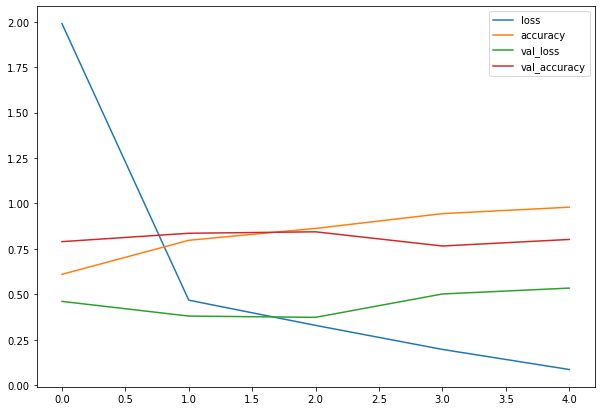

In [39]:
# lets plot the training cuves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [40]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss= history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, loss, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note** when a model"s **validation loss** starts to incrase, its likely the model is over fitting the training data set. this means its learning the patterns in the training dataset *too well* and thus the models ablility to generalize to unsen data will be diminished

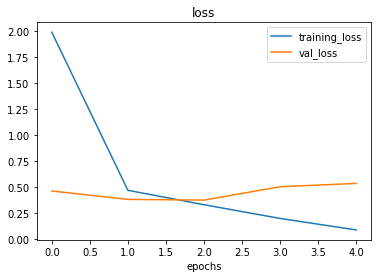

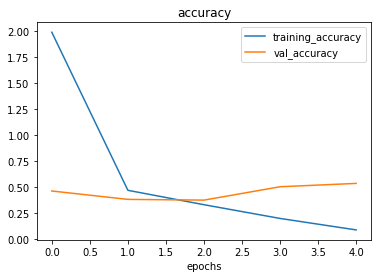

In [41]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. adjust the model parameters
Fitting a machine learning model comes in 3 steps:

0. create a basline
1. beat the baseline by overfitting a larger model
2. Reduce over fitting

ways to indulce overfitting
* Increase the number of cov layers
* Increase the number of cov filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regulization layers (such as MaxPool2D)
* Add more data.....

**Note** Reducing overfitting is also known as regularization

In [42]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [43]:
# compile the model
model_5.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [44]:
#fit the model
history_5 =  model_5.fit(train_data, # this is a combination of labels and samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                       
                       
                       )

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6220 - accuracy: 0.6433 - val_loss: 0.4937 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4796 - accuracy: 0.7873 - val_loss: 0.4733 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4329 - accuracy: 0.8100 - val_loss: 0.3515 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4306 - accuracy: 0.8107 - val_loss: 0.3516 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3950 - accuracy: 0.8327 - val_loss: 0.3336 - val_accuracy: 0.8600


In [45]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

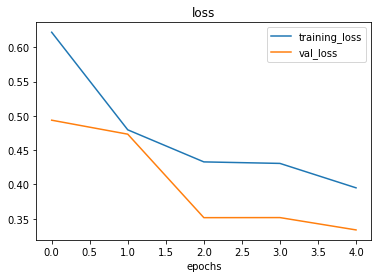

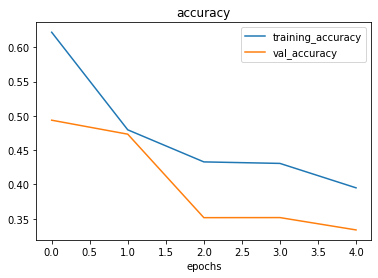

In [46]:
#plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmenatation

In [47]:
## Create ImageDataGenerator training instant with data arugumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range = 0.2,
                                             zoom_range= 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range =0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create Imagedatagenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


**What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or aomething similar

lets write some code to visualize data augmentataion

In [51]:
# import data and augment it from training directory
print('Agumented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False) # for demonstartion purpose only

# Create non- augumented train data batches
print("Non- augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False)           
IMG_SIZE =(224 , 224)
# create non-augmented test data batches
print('Agumented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                                   target_size= IMG_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False) # for demonstartion purpose only


Agumented training data
Found 1500 images belonging to 2 classes.
Non- augmented training data:
Found 1500 images belonging to 2 classes.
Agumented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on the training data using 'ImageDataGenerator' built in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded in the model

Finally lets visualize some  augumented data